In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy import stats

In [2]:
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv', delimiter = ',', encoding="utf8")

vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées

In [3]:
#pd.set_option("max_rows", None)
#pd.set_option('display.max_columns', None)
pd.set_option("max_colwidth", None)
data.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [4]:
def qualit(donnees):
    print("nb de lignes x nb de colonnes : ",donnees.shape,".\n")
    print("% de données manquantes :\n",(donnees.isna().sum()/len(donnees) * 100).sort_values(ascending = False),"\n")
    print("nb de lignes dupliquées :",donnees.duplicated().sum(),".\n")

In [5]:
qualit(data)

nb de lignes x nb de colonnes :  (3376, 46) .

% de données manquantes :
 Comments                           100.000000
Outlier                             99.052133
YearsENERGYSTARCertified            96.475118
ThirdLargestPropertyUseType         82.345972
ThirdLargestPropertyUseTypeGFA      82.345972
SecondLargestPropertyUseType        50.266588
SecondLargestPropertyUseTypeGFA     50.266588
ENERGYSTARScore                     24.970379
LargestPropertyUseTypeGFA            0.592417
LargestPropertyUseType               0.592417
ZipCode                              0.473934
ListOfAllPropertyUseTypes            0.266588
SourceEUIWN(kBtu/sf)                 0.266588
SourceEUI(kBtu/sf)                   0.266588
Electricity(kWh)                     0.266588
Electricity(kBtu)                    0.266588
NaturalGas(therms)                   0.266588
NaturalGas(kBtu)                     0.266588
TotalGHGEmissions                    0.266588
SteamUse(kBtu)                       0.266588
GHGEmi

### Definitions des variables disponibles

#### Données de situation des batiments
-'ZipCode', Code postal de la propriété.  
-'Neighborhood', Zone de voisinage de propriété définie par le département des quartiers de la ville de Seattle.  
........  

#### Données Structurelles ansi que la destination des batiments
-'NumberofBuildings', Nombre de bâtiments inclus dans le rapport de la propriété.  
-'NumberofFloors', Nombre d'étages signalés dans Portfolio Manager.  
-'PropertyGFATotal', Surface de plancher brute totale du bâtiment et du stationnement.  
-'PropertyGFAParking', Espace total en pieds carrés de tous les types de stationnement (entièrement fermé, partiellement fermé et ouvert).  
-'PropertyGFABuilding(s)', Espace au sol total en pieds carrés entre les surfaces extérieures des murs d'enceinte d'un bâtiment. Cela comprend toutes les zones à l'intérieur du ou des bâtiments, telles que l'espace des locataires, les espaces communs, les cages d'escalier, les sous-sols, le stockage, etc.  
-'ListOfAllPropertyUseTypes', Toutes les utilisations de la propriété signalées dans Portfolio Manager.  
-'LargestPropertyUseType', La plus grande utilisation d'une propriété (par exemple, bureau, magasin de détail) par GFA.  
-'LargestPropertyUseTypeGFA', La surface de plancher brute (GFA) de la plus grande utilisation de la propriété.
-'BuildingType', Classification des types de bâtiments de la ville de Seattle.  
-'PrimaryPropertyType', L'utilisation principale d'une propriété (par exemple, bureau, magasin de détail). L'usage principal est défini comme une fonction qui représente plus de 50 % d'un bien.  
-'YearBuilt', Année au cours de laquelle une propriété a été construite ou a fait l'objet d'une rénovation complète.
  
#### Données energetiques des batiments
-'SiteEUI(kBtu/sf)', L'intensité de consommation d'énergie du site (IUE) est la consommation d'énergie du site d'une propriété divisée par sa surface de plancher brute. La consommation d'énergie du site est le montant annuel de toute l'énergie consommée par la propriété sur le site, tel qu'indiqué sur les factures de services publics. L'IE du site est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.  
-'SiteEUIWN(kBtu/sf)', L'intensité de consommation d'énergie du site (EUI) normalisée par les conditions météorologiques (WN) est l'énergie du site WN d'une propriété divisée par sa surface de plancher brute (en pieds carrés). L'énergie du site WN est la consommation d'énergie du site que la propriété aurait consommée dans des conditions météorologiques moyennes sur 30 ans. L'IUE du site WN est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.  
-'SourceEUI(kBtu/sf)', L'intensité de consommation d'énergie à la source (IUE) est la consommation d'énergie à la source d'une propriété divisée par sa surface de plancher brute. La consommation d'énergie à la source est l'énergie annuelle utilisée pour faire fonctionner la propriété, y compris les pertes de production, de transmission et de distribution. Source EUI est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.  
-'SourceEUIWN(kBtu/sf)', L'intensité d'utilisation de l'énergie à la source (EUI) normalisée par les conditions météorologiques (WN) est l'énergie à la source WN d'une propriété divisée par sa surface de plancher brute. L'énergie à la source WN est l'utilisation de l'énergie à la source que la propriété aurait consommée dans des conditions météorologiques moyennes sur 30 ans. WN Source EUI est mesuré en milliers d'unités thermiques britanniques (kBtu) par pied carré.  
-'SiteEnergyUse(kBtu)', La quantité annuelle d'énergie consommée par la propriété à partir de toutes les sources d'énergie.  
-'SiteEnergyUseWN(kBtu)', La quantité annuelle d'énergie consommée par la propriété à partir de toutes les sources d'énergie, ajustée à ce que la propriété aurait consommé dans des conditions météorologiques moyennes sur 30 ans.  
-'SteamUse(kBtu)', La quantité annuelle de vapeur de quartier consommée par la propriété sur place, mesurée en milliers d'unités thermiques britanniques (kBtu).  
-'Electricity(kWh)', La quantité annuelle d'électricité consommée par la propriété sur place, y compris l'électricité achetée sur le réseau et générée par des systèmes renouvelables sur place, mesurée en kWh.  
-'Electricity(kBtu)', La quantité annuelle d'électricité consommée par la propriété sur place, y compris l'électricité achetée sur le réseau et générée par des systèmes renouvelables sur place, mesurée en milliers d'unités thermiques britanniques (kBtu).  
-'NaturalGas(therms)', La quantité annuelle de gaz naturel fourni par les services publics consommée par la propriété, mesurée en thermes.  
-'NaturalGas(kBtu)', La quantité annuelle de gaz naturel fourni par les services publics consommée par la propriété, mesurée en milliers d'unités thermiques britanniques (kBtu).  

#### Energy score
-'YearsENERGYSTARCertified', Depuis des années, la propriété a reçu la certification ENERGY STAR.  
-'ENERGYSTARScore', Une EPA a calculé une note de 1 à 100 qui évalue la performance énergétique globale d'une propriété, sur la base de données nationales pour contrôler les différences entre le climat, les utilisations des bâtiments et les opérations. Un score de 50 représente la médiane nationale.  

#### Emissions de gaz à effet de serre des batiments
-TotalGHGEmissions', La quantité totale d'émissions de gaz à effet de serre, y compris le dioxyde de carbone, le méthane et les gaz d'oxyde nitreux libérés dans l'atmosphère à la suite de la consommation d'énergie de la propriété, mesurée en tonnes métriques d'équivalent dioxyde de carbone. Ce calcul utilise un facteur d'émissions de GES du portefeuille de ressources de production de Seattle City Light. Cela utilise le facteur d'émissions 2015 de Seattle City Light de 52,44 lb CO2e/MWh jusqu'à ce que le facteur 2016 soit disponible. Facteur de vapeur Enwave = 170,17 lb CO2e/MMBtu. Facteur de gaz provenant de EPA Portfolio Manager = 53,11 kg CO2e/MBtu.  
-'GHGEmissionsIntensity', Émissions totales de gaz à effet de serre divisées par la surface de plancher brute de la propriété, mesurée en kilogrammes d'équivalent en dioxyde de carbone par pied carré. Ce calcul utilise un facteur d'émissions de GES du portefeuille de ressources de production de Seattle City Light.  

#### informations diverses
-'DefaultData', La propriété a utilisé des données par défaut pour au moins une caractéristique de la propriété.  
-'ComplianceStatus', Si une propriété a satisfait aux exigences d'analyse comparative énergétique pour l'année de déclaration en cours.  
-'Outlier', Si une propriété est une valeur aberrante élevée ou basse (O/N).  
-'OSEBuildingID', Un identifiant unique attribué à chaque propriété couverte par la Seattle Benchmarking Ordinance.  
-'DataYear', Année civile (janvier-décembre) représentée par chaque enregistrement de données.  
-'PropertyName', Nom de propriété officiel.  

### Premiere selection des variables à conserver

In [6]:
df = data[['BuildingType', 'PrimaryPropertyType', 
             'ZipCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings', 
             'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
             'ListOfAllPropertyUseTypes','LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 
             'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 
             'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].copy()
df.head(5)

,BuildingType,PrimaryPropertyType,ZipCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
0,NonResidential,Hotel,98101.0,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,7226362.5,249.98
1,NonResidential,Hotel,98101.0,DOWNTOWN,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,8387933.0,295.86
2,NonResidential,Hotel,98101.0,DOWNTOWN,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,43.0,72587024.0,2089.28
3,NonResidential,Hotel,98101.0,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,56.0,6794584.0,286.43
4,NonResidential,Hotel,98121.0,DOWNTOWN,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,75.0,14172606.0,505.01


In [7]:
df.describe()

,ZipCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
count,3360.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3.371000e+03,3367.000000
mean,98116.949107,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,5.403667e+06,119.723971
std,18.615205,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,2.161063e+07,538.832227
min,98006.000000,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000e+00,-0.800000
25%,98105.000000,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,9.251286e+05,9.495000
50%,98115.000000,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,1.803753e+06,33.920000
75%,98122.000000,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,4.222455e+06,93.940000
max,98272.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,8.739237e+08,16870.980000


In [8]:
df.describe(include=['O'])

,BuildingType,PrimaryPropertyType,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
count,3376,3376,3376,3367,3356,1679,596
unique,8,24,19,466,56,50,44
top,NonResidential,Low-Rise Multifamily,DOWNTOWN,Multifamily Housing,Multifamily Housing,Parking,Retail Store
freq,1460,987,573,866,1667,976,110


### Visuels de la distribution des variables cibles

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


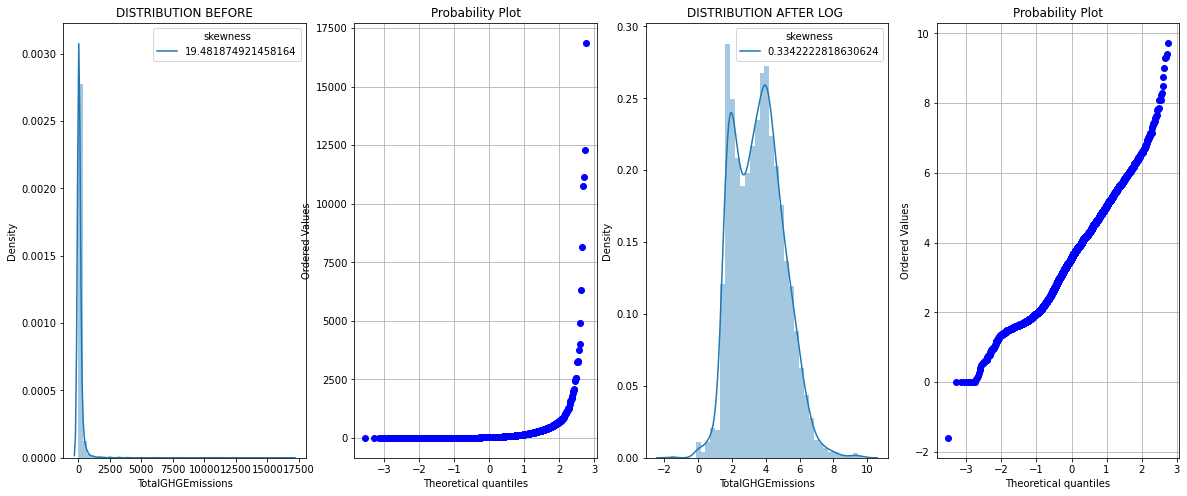

In [9]:
plt.figure(figsize=(20,8))

## log transformation
plt.subplot(1,4,1)
sns.distplot(df.TotalGHGEmissions)
plt.title("DISTRIBUTION BEFORE",)
skewness=str(df.TotalGHGEmissions.skew())
plt.legend([skewness],title=("skewness"))


plt.subplot(1,4,2)
stats.probplot(df.TotalGHGEmissions,dist="norm",plot=plt)
plt.grid()

plt.subplot(1,4,3)
log_target=np.log1p(df.TotalGHGEmissions)
ax=sns.distplot(log_target)
plt.title("DISTRIBUTION AFTER LOG ",)
skewness=str(log_target.skew())
plt.legend([skewness],title=("skewness"))
#plt.show()

plt.subplot(1,4,4)
stats.probplot(log_target,dist="norm",plot=plt)
plt.grid()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalGHGEmissions', ylabel='Density'>

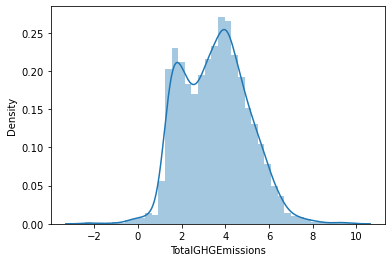

In [10]:
temp = ((np.log(df['TotalGHGEmissions'])).replace([np.inf, -np.inf], np.nan)).dropna()
sns.distplot(temp)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


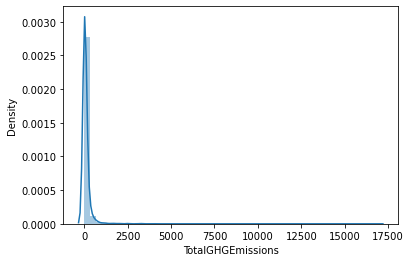

In [11]:
sns.distplot(df['TotalGHGEmissions']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


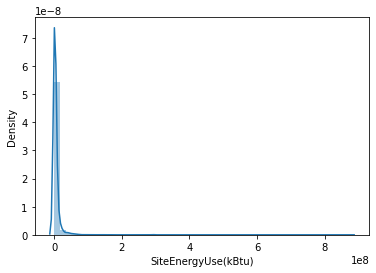

In [12]:
sns.distplot(df['SiteEnergyUse(kBtu)']);

### Visuel de la distribution de la variable 'ENERGYSTARScore'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


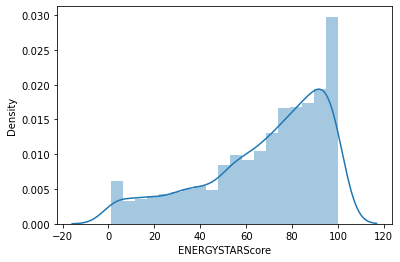

In [13]:
sns.distplot(df['ENERGYSTARScore']);

### Description rapides des variables

In [14]:
echantillon_col = []
for column in df:
    list_col = str(list(df[column].head(5)))
    echantillon_col.append(list_col)

count = []
for column in df:
    comptage = len(df[column].unique())
    count.append(comptage)

d = {'% manquants':(df.isna().sum()/len(df) * 100) ,'type':list(df.dtypes),'unique':count,'échantillon des 5 premieres valeurs ':echantillon_col}
ColonnesTypes = pd.DataFrame(data=d)
pd.options.display.max_rows = 81
ColonnesTypes.sort_values(by=['% manquants'],ascending = True)

,% manquants,type,unique,échantillon des 5 premieres valeurs
BuildingType,0.000000,object,8,"['NonResidential', 'NonResidential', 'NonResidential', 'NonResidential', 'NonResidential']"
PropertyGFAParking,0.000000,int64,496,"[0, 15064, 196718, 0, 62000]"
PropertyGFATotal,0.000000,int64,3195,"[88434, 103566, 956110, 61320, 175580]"
NumberofFloors,0.000000,int64,50,"[12, 11, 41, 10, 18]"
PropertyGFABuilding(s),0.000000,int64,3193,"[88434, 88502, 759392, 61320, 113580]"
Neighborhood,0.000000,object,19,"['DOWNTOWN', 'DOWNTOWN', 'DOWNTOWN', 'DOWNTOWN', 'DOWNTOWN']"
PrimaryPropertyType,0.000000,object,24,"['Hotel', 'Hotel', 'Hotel', 'Hotel', 'Hotel']"
YearBuilt,0.000000,int64,113,"[1927, 1996, 1969, 1926, 1980]"
SiteEnergyUse(kBtu),0.148104,float64,3355,"[7226362.5, 8387933.0, 72587024.0, 6794584.0, 14172606.0]"
NumberofBuildings,0.236967,float64,18,"[1.0, 1.0, 1.0, 1.0, 1.0]"


### Retrait des observations (destinées à l’habitation) et création de la variable age de l'immeuble et retrait de variables inutiles

In [15]:
df = df.drop(['ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA','ZipCode'], axis=1)
df = df[df['ListOfAllPropertyUseTypes'] != 'Multifamily Housing']
df['age'] = 2016 - df['YearBuilt']
df = df.drop('YearBuilt', axis=1)

### Les variables numeriques

### Visualisation de la dispersion des variables numeriques

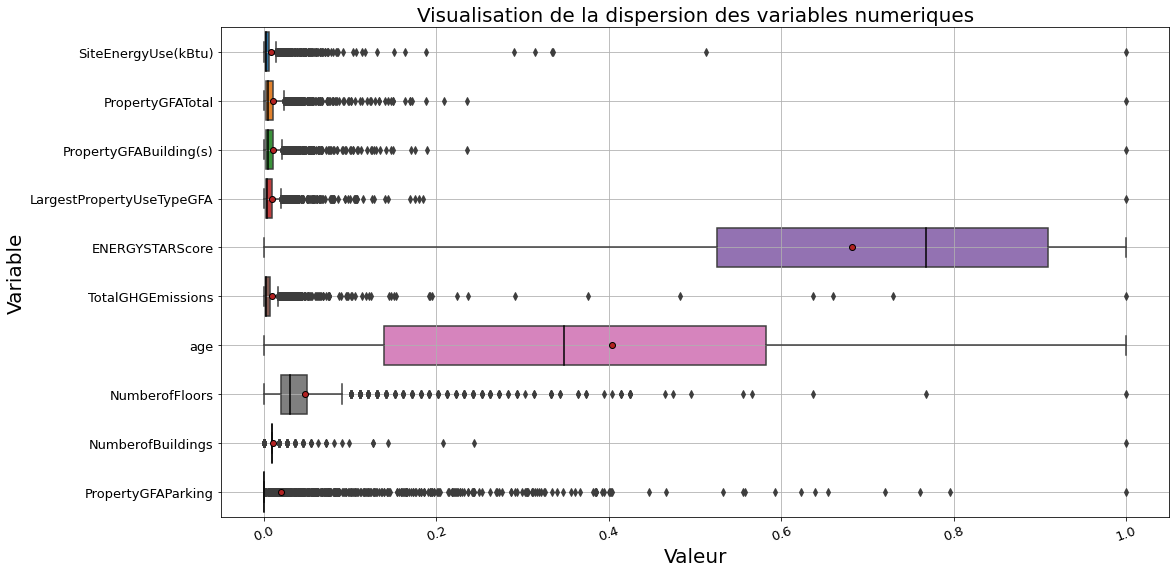

In [16]:
df_num = df[['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal','ENERGYSTARScore','LargestPropertyUseTypeGFA',
 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'TotalGHGEmissions', 'age','SiteEnergyUse(kBtu)']].copy()
df_num_std = (df_num-df_num.min())/(df_num.max()-df_num.min())
temp3 = pd.DataFrame(df_num_std, columns = df_num.select_dtypes(include=['float64','int64']).columns.tolist(), index = df_num.select_dtypes(include=['float64','int64']).index.tolist())
temp3 = pd.melt(temp3)

ordre = df_num.select_dtypes(include=['float64','int64']).median().sort_values(ascending = False).index.tolist()
plt.figure(figsize=(17,9))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
             'markerfacecolor':'firebrick'}

sns.boxplot(y="variable", x="value",showfliers=True, medianprops=medianprops, 
             order = ordre, showmeans=True, meanprops=meanprops,orient='h',data=temp3)

plt.xticks(fontsize = 13,color='k', rotation = 20)
plt.yticks(fontsize = 13,color='k')

plt.ylabel("Variable",color='k',fontsize=20)
plt.xlabel("Valeur", color='k',fontsize=20)
plt.title("Visualisation de la dispersion des variables numeriques", fontsize=20)

plt.grid(True)
plt.draw()

### Les variables categorielles

In [17]:
df.select_dtypes(exclude=['int64','float64'])

,BuildingType,PrimaryPropertyType,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType
0,NonResidential,Hotel,DOWNTOWN,Hotel,Hotel,NaN
1,NonResidential,Hotel,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Parking
2,NonResidential,Hotel,DOWNTOWN,Hotel,Hotel,NaN
3,NonResidential,Hotel,DOWNTOWN,Hotel,Hotel,NaN
4,NonResidential,Hotel,DOWNTOWN,"Hotel, Parking, Swimming Pool",Hotel,Parking
...,...,...,...,...,...,...
3371,Nonresidential COS,Office,GREATER DUWAMISH,Office,Office,NaN
3372,Nonresidential COS,Other,DOWNTOWN,Other - Recreation,Other - Recreation,NaN
3373,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,"Fitness Center/Health Club/Gym, Other - Recreation, Swimming Pool",Other - Recreation,Fitness Center/Health Club/Gym
3374,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,"Fitness Center/Health Club/Gym, Food Service, Office, Other - Recreation, Pre-school/Daycare",Other - Recreation,Fitness Center/Health Club/Gym


In [18]:
df.describe(include=['O'])

,BuildingType,PrimaryPropertyType,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType
count,2510,2510,2510,2501,2496,1674
unique,8,24,19,465,56,50
top,NonResidential,Low-Rise Multifamily,DOWNTOWN,"Multifamily Housing, Parking",Multifamily Housing,Parking
freq,1459,393,510,464,807,975


In [19]:
df.select_dtypes(exclude=['int64','float64']).nunique()

BuildingType                      8
PrimaryPropertyType              24
Neighborhood                     19
ListOfAllPropertyUseTypes       465
LargestPropertyUseType           56
SecondLargestPropertyUseType     50
dtype: int64

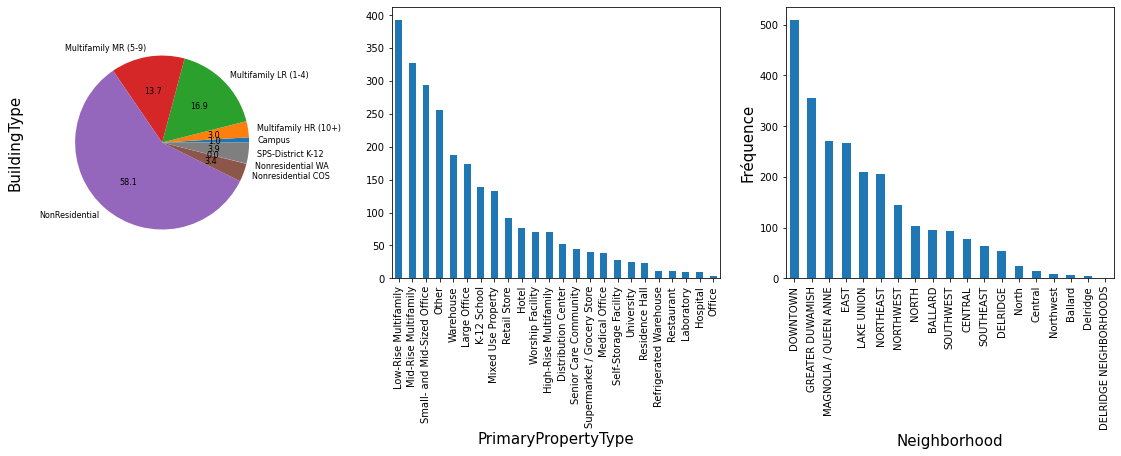

In [20]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
df.groupby('BuildingType').size().plot(kind='pie', autopct='%.1f', radius=0.8, rotatelabels=False, textprops={'fontsize': 8})
plt.ylabel('BuildingType',fontsize =15)

plt.subplot(132)
df.groupby('PrimaryPropertyType').size().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("PrimaryPropertyType",color='k',fontsize=15)
plt.xticks(fontsize = 10,color='k')

plt.subplot(133)
df.groupby('Neighborhood').size().sort_values(ascending=False).plot(kind='bar')
plt.ylabel("Fréquence",color='k',fontsize=15)
plt.xlabel("Neighborhood",color='k',fontsize=15)
plt.xticks(fontsize = 10,color='k')

#plt.suptitle('Les variables catégorielles',fontsize = 30)
plt.show()

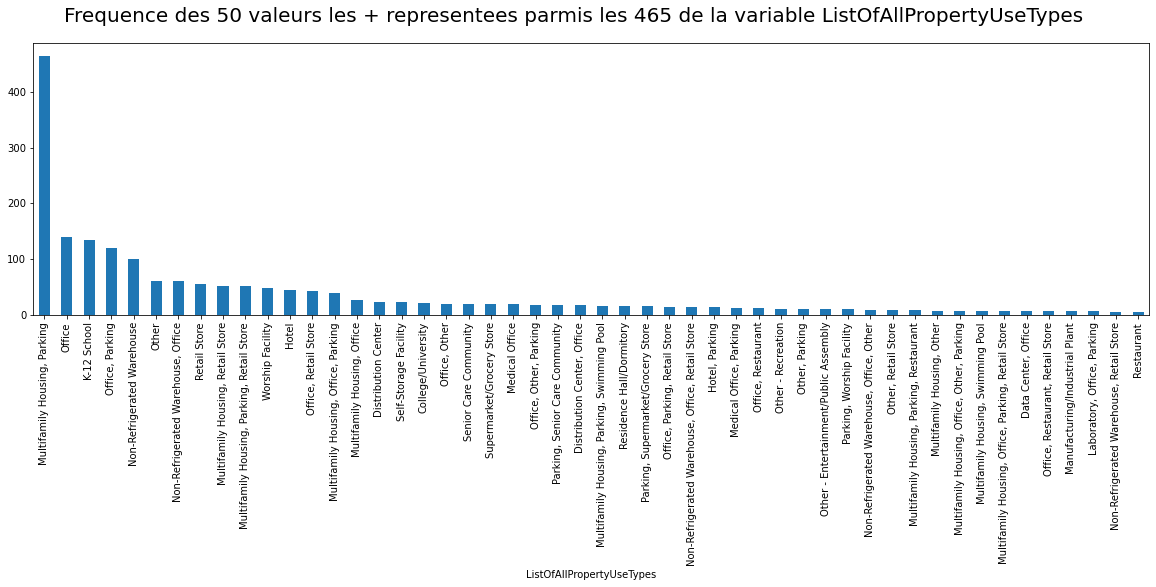

In [21]:
plt.figure(figsize=(20, 5))
df.groupby('ListOfAllPropertyUseTypes').size().sort_values(ascending=False)[:50].plot(kind='bar')
plt.suptitle('Frequence des 50 valeurs les + representees parmis les 465 de la variable ListOfAllPropertyUseTypes',fontsize = 20);

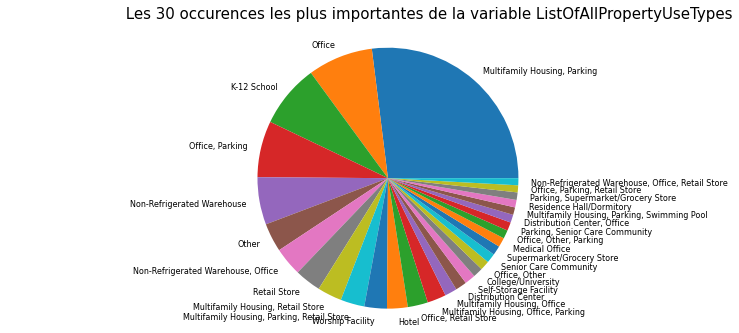

In [22]:
plt.figure(figsize=(20, 5))
df.groupby('ListOfAllPropertyUseTypes').size().sort_values(ascending=False)[:30].plot(kind='pie', radius=1.2, rotatelabels=False, textprops={'fontsize': 8})
plt.ylabel( '',fontsize =15);
plt.suptitle('                         Les 30 occurences les plus importantes de la variable ListOfAllPropertyUseTypes',fontsize = 15);

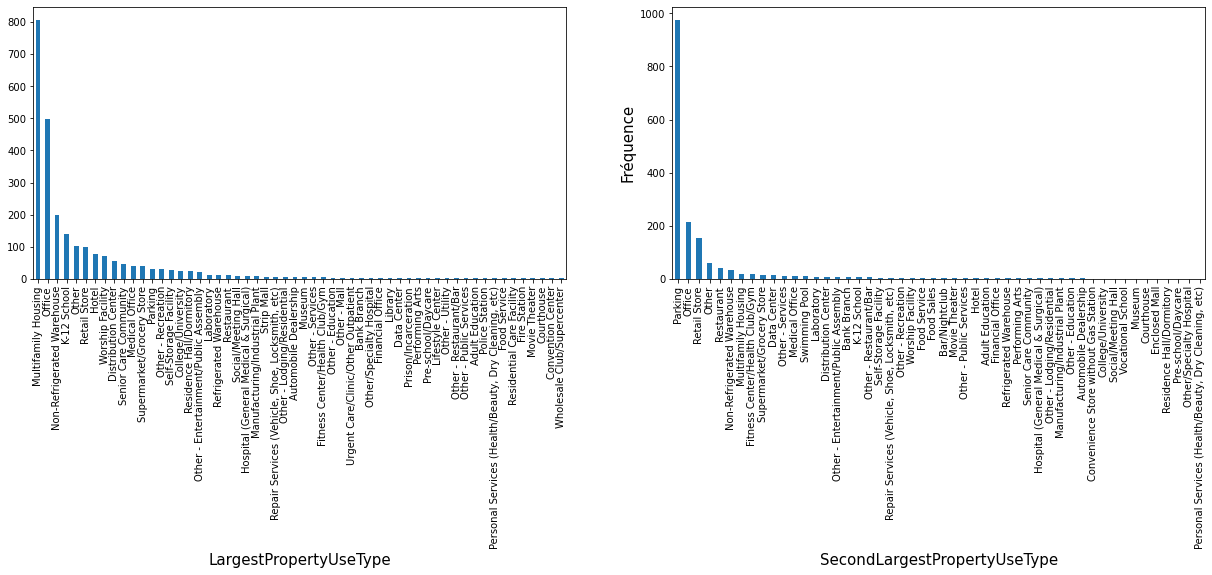

In [23]:
plt.figure(figsize=(21, 5))

plt.subplot(121)
df.groupby('LargestPropertyUseType').size().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("LargestPropertyUseType",color='k',fontsize=15)
plt.xticks(fontsize = 10,color='k')

plt.subplot(122)
df.groupby('SecondLargestPropertyUseType').size().sort_values(ascending=False).plot(kind='bar')
plt.ylabel("Fréquence",color='k',fontsize=15)
plt.xlabel("SecondLargestPropertyUseType",color='k',fontsize=15)
plt.xticks(fontsize = 10,color='k')

#plt.suptitle('Les variables catégorielles',fontsize = 30)
plt.show()

In [24]:
df.describe()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,age
count,2502.000000,2510.000000,2.510000e+03,2510.000000,2.510000e+03,2.496000e+03,1674.000000,1731.000000,2.505000e+03,2501.000000,2510.00000
mean,1.135492,4.739841,1.099091e+05,10365.095219,9.954401e+04,9.005317e+04,28498.641754,68.477759,6.663488e+06,147.363331,47.37251
std,2.427935,6.104873,2.501980e+05,36781.432827,2.381905e+05,2.314569e+05,54459.692842,27.713646,2.491908e+07,621.470486,33.74410
min,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,1.000000,0.000000e+00,-0.800000,1.00000
25%,1.000000,2.000000,3.050275e+04,0.000000,2.936275e+04,2.568600e+04,5000.000000,53.000000,1.086678e+06,13.710000,17.00000
50%,1.000000,3.000000,5.039250e+04,0.000000,4.839150e+04,4.344650e+04,10725.500000,77.000000,2.203758e+06,43.520000,41.00000
75%,1.000000,5.000000,1.080095e+05,0.000000,9.751275e+04,9.007850e+04,26640.000000,91.000000,5.453438e+06,117.790000,68.00000
max,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,100.000000,8.739237e+08,16870.980000,116.00000


### Retrait des observation incohérantes

In [25]:
print("nombre de lignes effacees dont la valeur number of building = 0",20*'_',df[df['NumberofBuildings'] == 0.0].shape[0])
df = df[df['NumberofBuildings'] != 0.0]
print("nombre de lignes effacees dont la valeur NumberofFloors = 0",20*'_',df[df['NumberofFloors']==0].shape[0])
df = df[df['NumberofFloors'] != 0.0]
print("nombre de lignes effacees dont la valeur TotalGHGEmissions < 0",20*'_',df[df['TotalGHGEmissions']<0].shape[0])
df = df[df['TotalGHGEmissions']>=0]

nombre de lignes effacees dont la valeur number of building = 0 ____________________ 71
nombre de lignes effacees dont la valeur NumberofFloors = 0 ____________________ 15
nombre de lignes effacees dont la valeur TotalGHGEmissions < 0 ____________________ 1


### Retrait des observations dont les variables selectionnées importantes sont manquantes et retrait de variables inutiles, df servira a creer un dataframe avec 4 categoriels a encoder et df1 servira a creer un dataframe avec 3 categoriels a encoder

In [26]:
df = df.dropna(subset=['NumberofBuildings','TotalGHGEmissions','SiteEnergyUse(kBtu)'],how='any')
df1 = df.copy()
df = df.dropna(subset=['LargestPropertyUseTypeGFA','LargestPropertyUseType'],how='any')
df1 = df1.drop(['LargestPropertyUseType','LargestPropertyUseTypeGFA'],axis=1).copy()

In [27]:
qualit(df)

nb de lignes x nb de colonnes :  (2409, 17) .

% de données manquantes :
 SecondLargestPropertyUseTypeGFA    32.835201
SecondLargestPropertyUseType       32.835201
ENERGYSTARScore                    30.178497
BuildingType                        0.000000
LargestPropertyUseType              0.000000
TotalGHGEmissions                   0.000000
SiteEnergyUse(kBtu)                 0.000000
LargestPropertyUseTypeGFA           0.000000
ListOfAllPropertyUseTypes           0.000000
PrimaryPropertyType                 0.000000
PropertyGFABuilding(s)              0.000000
PropertyGFAParking                  0.000000
PropertyGFATotal                    0.000000
NumberofFloors                      0.000000
NumberofBuildings                   0.000000
Neighborhood                        0.000000
age                                 0.000000
dtype: float64 

nb de lignes dupliquées : 0 .



In [28]:
qualit(df1)

nb de lignes x nb de colonnes :  (2414, 15) .

% de données manquantes :
 SecondLargestPropertyUseType       32.974316
SecondLargestPropertyUseTypeGFA    32.974316
ENERGYSTARScore                    30.240265
BuildingType                        0.000000
PrimaryPropertyType                 0.000000
Neighborhood                        0.000000
NumberofBuildings                   0.000000
NumberofFloors                      0.000000
PropertyGFATotal                    0.000000
PropertyGFAParking                  0.000000
PropertyGFABuilding(s)              0.000000
ListOfAllPropertyUseTypes           0.000000
SiteEnergyUse(kBtu)                 0.000000
TotalGHGEmissions                   0.000000
age                                 0.000000
dtype: float64 

nb de lignes dupliquées : 0 .



### Comptage des valeurs uniques par variable categoriel

In [29]:
list_col_cat = df.select_dtypes(exclude=['int64','float64']).columns.tolist()
for column in df[list_col_cat]:
    print(column,len(df[column].unique()))

BuildingType 8
PrimaryPropertyType 24
Neighborhood 19
ListOfAllPropertyUseTypes 445
LargestPropertyUseType 54
SecondLargestPropertyUseType 51


### Retrait des variables categoriels ayant trop de valeurs uniques de df et  df1

In [30]:
df = df.drop(['ListOfAllPropertyUseTypes','SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA'],axis=1)
df1 = df1.drop(['ListOfAllPropertyUseTypes','SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA'],axis=1)

### Les variables numeriques de df

In [31]:
df.select_dtypes(include=['int64','float64']).columns.tolist()

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'age']

### Les variables categorielles de df

In [32]:
df.select_dtypes(exclude=['int64','float64']).columns.tolist()

['BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'LargestPropertyUseType']

### Les variables numeriques de df1

In [33]:
df1.select_dtypes(include=['int64','float64']).columns.tolist()

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'age']

### Les variables categorielles de df1

In [34]:
df1.select_dtypes(exclude=['int64','float64']).columns.tolist()

['BuildingType', 'PrimaryPropertyType', 'Neighborhood']

### Encodage des 4 variables categorielles du dataframe df : creation de df4

In [35]:
list_col_cat = df.select_dtypes(exclude=['int64','float64']).columns.tolist()
import category_encoders as ce
encoder = ce.OneHotEncoder( cols = list_col_cat, use_cat_names = True)
df4 = encoder.fit_transform(df)
df4.shape

(2409, 115)

### Retrait des observations et colonnes inutiles (destinées à l’habitation) suite à l'encodage de df4, puis sauvegarde.

In [36]:
df4 = df4[df4['BuildingType_Multifamily MR (5-9)'] != 1]
df4 = df4[df4['BuildingType_Multifamily LR (1-4)'] != 1]
df4 = df4[df4['BuildingType_Multifamily HR (10+)'] != 1]
df4 = df4.drop(['BuildingType_Multifamily MR (5-9)','BuildingType_Multifamily LR (1-4)','BuildingType_Multifamily HR (10+)'], axis=1)
df4 = df4[df4['PrimaryPropertyType_High-Rise Multifamily'] != 1]
df4 = df4[df4['PrimaryPropertyType_Mid-Rise Multifamily'] != 1]
df4 = df4[df4['PrimaryPropertyType_Low-Rise Multifamily'] != 1]
df4 = df4.drop(['PrimaryPropertyType_Low-Rise Multifamily','PrimaryPropertyType_Mid-Rise Multifamily','PrimaryPropertyType_High-Rise Multifamily'],axis = 1)
df4 = df4[df4['LargestPropertyUseType_Multifamily Housing'] != 1]
df4 = df4.drop(['LargestPropertyUseType_Multifamily Housing'],axis = 1)
df4.name = 'dataframe_4encoded'
df4.to_csv('df4.csv')
df4.shape

(1582, 108)

### Encodage des 3 variables categorielles du dataframe df1 : creation de df3

In [37]:
list_col_cat2 = df1.select_dtypes(exclude=['int64','float64']).columns.tolist()
import category_encoders as ce
encoder = ce.OneHotEncoder( cols = list_col_cat2, use_cat_names = True)
df3 = encoder.fit_transform(df1)
df3.shape

(2414, 60)

### Retrait des observations et colonnes inutiles (destinées à l’habitation) suite à l'encodage df3, puis sauvegarde.

In [38]:
df3 = df3[df3['BuildingType_Multifamily MR (5-9)'] != 1]
df3 = df3[df3['BuildingType_Multifamily LR (1-4)'] != 1]
df3 = df3[df3['BuildingType_Multifamily HR (10+)'] != 1]
df3 = df3.drop(['BuildingType_Multifamily MR (5-9)','BuildingType_Multifamily LR (1-4)','BuildingType_Multifamily HR (10+)'], axis=1)
df3 = df3[df3['PrimaryPropertyType_High-Rise Multifamily'] != 1]
df3 = df3[df3['PrimaryPropertyType_Mid-Rise Multifamily'] != 1]
df3 = df3[df3['PrimaryPropertyType_Low-Rise Multifamily'] != 1]
df3 = df3.drop(['PrimaryPropertyType_Low-Rise Multifamily','PrimaryPropertyType_Mid-Rise Multifamily','PrimaryPropertyType_High-Rise Multifamily'],axis = 1)
df3.name = 'dataframe_3encoded'
df3.to_csv('df3.csv')
df3.shape

(1595, 54)

### Création des dataframe df_num3 et 4 (nommé  'dataframe_num3' et 4) contenant uniquement les variables numeriques de df3 et df4 sans les variables encodées, et creation d'une liste 'list_num3' et 4 contenant les listes des variables pour une utilisation ulterieure(passage en log mis a part energy_score)

In [39]:
df_num4 = df4[['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal','LargestPropertyUseTypeGFA',
 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'TotalGHGEmissions', 'age','SiteEnergyUse(kBtu)']].copy()
df_num3 = df3[['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'TotalGHGEmissions', 'age','SiteEnergyUse(kBtu)']].copy()
list_num4 = df_num4.columns.tolist()
list_num3 = df_num3.columns.tolist()

### Création d un dataframe df_log3 (nommé 'dataframe_encoded3_log') dont les variables de df3 non encodees ont ete passes en log('ENERGYSTARScore' exclus), puis sauvegarde.

In [40]:
df_log3= df3.copy()
df_log3[list_num3] = np.log(1+df_log3[list_num3])
df_log3[list_num3] = df_log3[list_num3].replace([np.inf, -np.inf],np.nan)
df_log3 = df_log3.dropna()
df_log3.name='dataframe_3encoded_log'
df_log3.to_csv('df_log3.csv')
df_log3.shape

(1059, 54)

### Création d un dataframe df_log4 (nommé 'dataframe_encoded4_log') dont les variables de df4 non encodees ont ete passes en log ('ENERGYSTARScore' exclus), puis sauvegarde.

In [41]:
df_log4= df4.copy()
df_log4[list_num4] = np.log(1+df_log4[list_num4])
df_log4[list_num4] = df_log4[list_num4].replace([np.inf, -np.inf],np.nan)
df_log4 = df_log4.dropna()
df_log4.name='dataframe_4encoded_log'
df_log4.to_csv('df_log4.csv')
df_log4.shape

(1054, 108)